**CII4Q3 Visi Komputer**

---



#Exercise 5: Membuat Klasifikasi dengan SVM dengan ekstrasi Fitur

---

<p>Nama  = Reynhard Powiwi - Muhammad Fadhil Fadhlurrahman </p>
<p>NIM   = 1301204091 - 1301204439 </p>
<p>Kelas = IF-44-PIL-IS01 📚👨‍🎓</p>

---

Buat program klasifikasi cats vs dogs menggunakan supervised learning. Disini kami menggunakan Support Vector Machine (SVM)



##### Copyright 2019 The TensorFlow Authors.

In [2]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.svm import SVC
from sklearn.metrics import classification_report

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=15,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      brightness_range=[0.8, 1.2], #tambahkan brightness untuk variasi kecerahan gambar.
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=60,  # 2000 images = batch_size * steps
      epochs=60,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)



--2023-11-06 12:44:52--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.207, 74.125.20.207, 108.177.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   299MB/s    in 0.2s    

2023-11-06 12:44:52 (299 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/60
60/60 - 18s - loss: 0.7039 - accuracy: 0.5000 - val_loss: 0.6919 - val_accuracy: 0.5010 - 18s/epoch - 307ms/step
Epoch 2/60
60/60 - 11s - loss: 0.7037 - accuracy: 0.5108 - val_loss: 0.6921 - val_accuracy: 0.5330 - 11s/epoch - 189ms/step
Epoch 3/60
60/60 - 12s - loss: 0.6934 - accuracy: 0.4975 - val_loss: 0.6962 - val_accuracy: 0.5000 - 12s/epoch - 195ms/step
Epoch 4/60
60/60 - 11s - loss: 0.6909 - accuracy: 0.5425 - val_loss: 0.6825 - val_accuracy: 0.5350 - 11s/epoch - 186ms/step
Epoch 5/60
60/60 - 11s - loss: 0.6794 - accuracy: 0.5792 - val_loss: 0.6777 - val_accuracy: 0.5850 - 11s/epoch - 177ms/step
Epoch 6/60
60/60 - 11s - loss: 0.6781 - accuracy: 0.6017 - val_loss: 0.6546 - val_accuracy: 0.6000 - 11s/epoch - 188ms/step
Epoch 7/60
60/60 - 11s - loss: 0.6517 - accuracy: 0.6375 - val_loss: 0.8764 - val_accuracy: 0.5020 - 11s/epoch - 186ms/step
Epoch 8/60
60/60 - 11s - loss: 0.6472 - accuracy

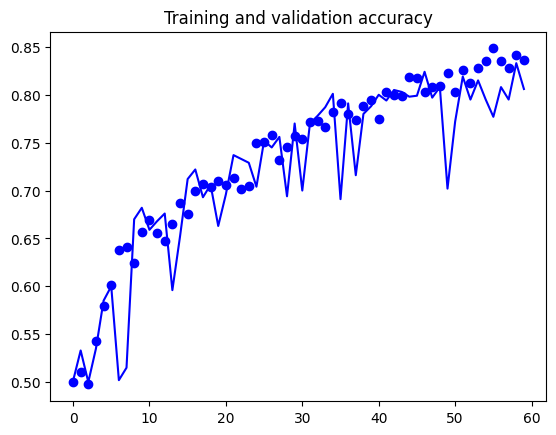

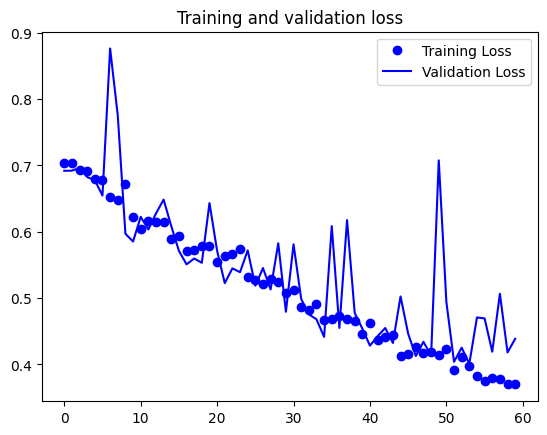

In [4]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Klasifikasi dengan SVM tanpa menggunakan ekstraksi fitur

In [5]:
# Membuat Klasifikasi SVM
svm_classifier = SVC(kernel='linear')



**Mengubah Bentuk Data Latih**

Data latih diambil dari generator data train_generator. Data awal ini dalam bentuk tensor yang merupakan hasil keluaran dari model jaringan saraf tiruan (neural network) sebelumnya. Data ini kemudian diubah bentuk (reshaped) menjadi matriks dua dimensi (2D) dengan dimensi (num_samples, feature_vector_length). Panjang vektor fitur (feature_vector_length) adalah hasil perkalian dari lebar,tinggi, dan jumlah saluran warna pada gambar yang digunakan, yaitu 150x150x3.

In [6]:
train_data, train_labels = train_generator.next()
num_samples, feature_vector_length = train_data.shape[0], train_data.shape[1] * train_data.shape[2] * train_data.shape[3]
train_data = train_data.reshape(num_samples, feature_vector_length)

**Melatih Klasifikasi SVM**

Klasifikasi SVM dilatih (fit) menggunakan data latih yang sudah diubah bentuk. Ini berarti SVM belajar untuk menentukan batas keputusan yang memisahkan gambar-gambar kucing dari gambar-gambar anjing. Model SVM disesuaikan dengan data latih sehingga dapat mengklasifikasikan gambar-gambar tersebut dengan benar.

In [7]:
svm_classifier.fit(train_data, train_labels)

SVC(kernel='linear')

**Merubah Bentuk Data Validasi**

Langkah selanjutnya adalah melakukan hal yang sama pada data validasi. Data validasi diambil dari generator data validation_generator, kemudian diubah bentuk ke dalam format yang sesuai dengan yang digunakan untuk data latih.

In [8]:
validation_data, validation_labels = validation_generator.next()
num_samples, feature_vector_length = validation_data.shape[0], validation_data.shape[1] * validation_data.shape[2] * validation_data.shape[3]
validation_data = validation_data.reshape(num_samples, feature_vector_length)

**Menggunakan Klasifikasi SVM untuk Prediksi**

Setelah klasifikasi SVM dilatih dan data validasi sudah diubah bentuk, model SVM digunakan untuk melakukan prediksi pada data validasi. Ini berarti SVM akan mengklasifikasikan gambar-gambar validasi ke dalam dua kelas, "Kucing" atau "Anjing."

In [9]:
predictions = svm_classifier.predict(validation_data)

**Evaluasi Klasifikasi**

Terakhir, kode tersebut menggunakan perpustakaan sklearn untuk membuat laporan evaluasi klasifikasi. Laporan ini mencakup sejumlah metrik evaluasi seperti akurasi, presisi, dan lainnya, yang mengukur seberapa baik klasifikasi dilakukan. Hasil laporan ini dicetak ke layar dengan print(report).

In [10]:
# Create a label mapping dictionary
label_mapping = {0.0: 'Kucing', 1.0: 'Anjing'}

# Map the predictions and validation labels to the descriptive labels
predictions_descriptive = [label_mapping[label] for label in predictions]
validation_labels_descriptive = [label_mapping[label] for label in validation_labels]

# Evaluate the classifier
report_no_extract = classification_report(validation_labels_descriptive, predictions_descriptive)
print(report_no_extract)

              precision    recall  f1-score   support

      Anjing       0.55      0.67      0.60         9
      Kucing       0.67      0.55      0.60        11

    accuracy                           0.60        20
   macro avg       0.61      0.61      0.60        20
weighted avg       0.61      0.60      0.60        20



*   **Precision**: Precision mengukur sejauh mana model memprediksi dengan benar kelas positif
*   **Recall**: Recall mengukur sejauh mana model berhasil menemukan semua instance kelas yang benar.
*   **F1-Score**: F1-score adalah rata-rata harmonik dari precision dan recall.
*   **Support**: Ini adalah jumlah instance yang termasuk dalam masing-masing kelas dalam dataset validasi.
*   **Accuracy**: Akurasi adalah ukuran dari sejauh mana model benar-benar memprediksi kelas yang benar

Dalam keseluruhan, laporan ini menunjukkan bahwa model mengalami masalah dengan precision dan recall yang sangat rendah. Hal ini mungkin disebabkan oleh kita tidak menggunakan ekstrasi fitur, namun hanya langsung mengklasifikasi sehingga hasil klasifikasi masih buruk

# Klasifikasi dengan SVM dengan ektrasi fitur Histogram of Oriented Gradients (HOG)

**Import Library**

Import labrary yang dibutuhkan.


*   numpy untuk operasi numberik
*   cv2 untuk pemrosesan citra
*   skimage.feature untuk metode ekstrasi fitur HOG


Kemudian inisialisasi klasifikasi SVM dengan kernel linerar menggunakan  SVC(kernel='linear')



In [23]:
import numpy as np
import cv2
from skimage.feature import hog

# Membuat sebuah Klasifikasi SVM
svm_classifier = SVC(kernel='linear')

**Ekstraksi Fitur HOG untuk data training**

Melakukan ekstraksi fitur HOG dari data training yang diberikan oleh train_generator. kemudian setiap gambar dalam format RGB akan dikonversi menjadi citra skala abu-abu. dan setelah itu baru dilakukan ektraksi fitur dari citra menggunakan metode HOG. terakhir, hasil dari fitur HOG akan dimasukan ke sebuah list.


Kemudian masuk ke Reshaping, dimana fitur HOG yang dari sebuah list akan diubah kedalam bentuk array numpy. kemudian jumlah sampel dan panjang vektor fitur diambil dari bentuk array. serta label training sesuai dengan jumlah sampel yang telah di ekstraksi.

Terakhir kita melatih klasifikasi SVM dari data training.

In [48]:
# Ekstraksi Fitur HOG dari data training
hog_features_train = []
train_data, train_labels = train_generator.next()

for i in range(train_data.shape[0]):
    # Mengubah image ke greyscale
    gray_image = cv2.cvtColor(train_data[i], cv2.COLOR_RGB2GRAY)
    # Ekstrak Fitur HOG
    features, hog_image = hog(gray_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    hog_features_train.append(features)

# Membentuk kembali data training (num_samples, feature_vector_length)
hog_features_train = np.array(hog_features_train)
num_samples, feature_vector_length = hog_features_train.shape[0], hog_features_train.shape[1]
train_labels = train_labels[:num_samples]  # Make sure labels match the number of samples

# Melatih klasifikasi SVM
svm_classifier.fit(hog_features_train, train_labels)

SVC(kernel='linear')

**Ekstraksi Fitur HOG untuk data validasi**

Hal yang sama dilakukan namun pada data validasi. kemudian klasifikasi yang telah dilatih tadi akan digunakan untuk memprediksi hasil pada data validasi

In [49]:
# Ekstraksi Fitur HOG dari validasi
hog_features_validation = []
validation_data, validation_labels = validation_generator.next()

for i in range(validation_data.shape[0]):
    # Mengubah image ke greyscale
    gray_image = cv2.cvtColor(validation_data[i], cv2.COLOR_RGB2GRAY)
    # Ekstrak Fitur HOG
    features, hog_image = hog(gray_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    hog_features_validation.append(features)

# Membentuk kembali data validasi (num_samples, feature_vector_length)
hog_features_validation = np.array(hog_features_validation)
num_samples, feature_vector_length = hog_features_validation.shape[0], hog_features_validation.shape[1]
validation_labels = validation_labels[:num_samples]  # Make sure labels match the number of samples\

# melakukan prediksi menggunakan klasifikasi SVM yang telah dilatih
predictions = svm_classifier.predict(hog_features_validation)

**Evaluasi Klasifikasi**

Terakhir, sebuah kamus dibuat untuk memetakan label numerik. dimana (0.0) sebagai kucing dan (1.0) sebagai anjing. dan dilakukan evaluasi prediksi dan label validasi

In [50]:
# Membuat kamus pemetaan label
label_mapping = {0.0: 'Kucing', 1.0: 'Anjing'}

# Memetakan hasil prediksi dan label validasi ke label deskriptif
predictions_descriptive = [label_mapping[label] for label in predictions]
validation_labels_descriptive = [label_mapping[label] for label in validation_labels]

# Mengevaluasi klasifikasinya
report_HOG = classification_report(validation_labels_descriptive, predictions_descriptive)
print(report_HOG)

              precision    recall  f1-score   support

      Anjing       0.67      1.00      0.80        12
      Kucing       1.00      0.25      0.40         8

    accuracy                           0.70        20
   macro avg       0.83      0.62      0.60        20
weighted avg       0.80      0.70      0.64        20



# Klasifikasi dengan SVM dengan ektrasi fitur LBP

**Import Library**

Import labrary yang dibutuhkan.


*   classification_report untuk menghasilkan laporan klasifikasi
*   compute_class_weight untuk menghitung bobot kelas berimbang
*   skimage.feature untuk metode ekstrasi fitur LBP


Kemudian inisialisasi klasifikasi SVM dengan kernel linerar menggunakan  SVC(kernel='linear')

In [15]:
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from skimage.feature import local_binary_pattern

**Ekstraksi Fitur LBP untuk data training**

Melakukan ekstraksi fitur LBP dari data training yang diberikan oleh train_generator. kemudian setiap gambar dalam format RGB akan dikonversi menjadi citra skala abu-abu. dan setelah itu baru dilakukan ektraksi fitur dari citra menggunakan metode HOG. Kemudian kita menghitung histogram LBP. terakhir, hasil dari histogram LBP akan dimasukan ke sebuah list.


Kemudian masuk ke Reshaping, dimana hasil histogram LBP yang dari sebuah list akan diubah kedalam bentuk array numpy. kemudian menghitung bobot kelas yang seimbang sehingga model dapat memperlakukan kelas yang kurang umum menjadi lebih baik. Terakhir, menginisialisasikan  SVM dengan kernel linear dan menggunakan bobot kelas yang dihitung dalam model SVM

In [71]:
# Ekstraksi LBP fitur dari data training
lbp_features_train = []
train_data, train_labels = train_generator.next()

for i in range(train_data.shape[0]):
    gray_image = cv2.cvtColor(train_data[i], cv2.COLOR_RGB2GRAY)
    radius = 1
    n_points = 8 * radius
    lbp_image = local_binary_pattern(gray_image, n_points, radius, method='uniform')
    lbp_hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    lbp_features_train.append(lbp_hist)

lbp_features_train = np.array(lbp_features_train)

# Melatih klasifikasi SVM dengan menggunakan bobot kelas
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
svm_classifier = SVC(kernel='linear', class_weight=dict(enumerate(class_weights)))
svm_classifier.fit(lbp_features_train, train_labels)

SVC(class_weight={0: 1.1111111111111112, 1: 0.9090909090909091},
    kernel='linear')

**Ekstraksi Fitur LBP untuk data validasi**

Hal yang sama dilakukan namun pada data validasi. kemudian klasifikasi SVM yang telah dilatih tadi digunakan untuk memprediksi hasil pada data validasi.

In [72]:
# Ekstraksi LBP fitur dari data validasi
lbp_features_validation = []
for i in range(validation_data.shape[0]):
    gray_image = cv2.cvtColor(validation_data[i], cv2.COLOR_RGB2GRAY)
    radius = 1
    n_points = 8 * radius
    lbp_image = local_binary_pattern(gray_image, n_points, radius, method='uniform')
    lbp_hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    lbp_features_validation.append(lbp_hist)

lbp_features_validation = np.array(lbp_features_validation)

# melakukan prediksi menggunakan klasifikasi SVM yang telah dilatih
predictions = svm_classifier.predict(lbp_features_validation).astype(int)

**Evaluasi Klasifikasi**

Terakhir, sebuah kamus dibuat untuk memetakan label numerik. dimana (0.0) sebagai kucing dan (1.0) sebagai anjing. dan dilakukan evaluasi prediksi dan label validasi

In [73]:
# Membuat kamus pemetaan label
label_mapping = {0: 'Kucing', 1: 'Anjing'}

# Memetakan hasil prediksi dan label validasi ke label deskriptif
predictions_descriptive = [label_mapping[label] for label in predictions]
validation_labels_descriptive = [label_mapping[label] for label in validation_labels.astype(int)]

# Mengevaluasi klasifikasinya
report_LBP = classification_report(validation_labels_descriptive, predictions_descriptive)
print(report_LBP)



              precision    recall  f1-score   support

      Anjing       0.71      1.00      0.83        12
      Kucing       1.00      0.38      0.55         8

    accuracy                           0.75        20
   macro avg       0.85      0.69      0.69        20
weighted avg       0.82      0.75      0.71        20



# Hasil

In [76]:
print(report_no_extract)

              precision    recall  f1-score   support

      Anjing       0.55      0.67      0.60         9
      Kucing       0.67      0.55      0.60        11

    accuracy                           0.60        20
   macro avg       0.61      0.61      0.60        20
weighted avg       0.61      0.60      0.60        20



In [74]:
print(report_HOG)

              precision    recall  f1-score   support

      Anjing       0.67      1.00      0.80        12
      Kucing       1.00      0.25      0.40         8

    accuracy                           0.70        20
   macro avg       0.83      0.62      0.60        20
weighted avg       0.80      0.70      0.64        20



In [75]:
print(report_LBP)

              precision    recall  f1-score   support

      Anjing       0.71      1.00      0.83        12
      Kucing       1.00      0.38      0.55         8

    accuracy                           0.75        20
   macro avg       0.85      0.69      0.69        20
weighted avg       0.82      0.75      0.71        20



Kita dapat melihat hasil akurasi diatas.

*   Jika menggunakan klasifikasi SVM langsung tanpa ekstraksi fitur menghasilkan akurasi 60%
*   Jika menggunakan klasifikasi SVM dengan ekstrasi fitur HOG menghasilkan akurasi 70%
*   Jika menggunakan klasifikasi SVM dengan ekstraksi fitur LBP menghasilkan akurasi 75%

berdasarkan hasil diatas kita dapat menyimpulkan bahwa menggunakan ekstraksi fitur sebelum melakukan klasifikasi akan meningkatkan performa dan akurasi. Kemudian kita juga dapat melihat bahwa fitur LBP menghasilkan akurasi yang lebih tinggi dibandingkan dengan ekstraksi fitur HOG

